In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [122]:
#Importing the data
data = pd.read_csv(r'C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
data.head(10)

,id,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,NaN,2010-06-28,2.010000e+13,NaN,-unknown-,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,NaN,2011-05-25,2.010000e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,NaN,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,NaN,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,NaN,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,NaN,2010-01-01,2.010000e+13,2010-01-02,-unknown-,NaN,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,NaN,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,NaN,2010-01-03,2.010000e+13,2010-01-13,FEMALE,47.0,basic,NaN,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,NaN,2010-01-04,2.010000e+13,2010-07-29,FEMALE,50.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,NaN,2010-01-04,2.010000e+13,2010-01-04,-unknown-,46.0,basic,0.0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
#Converting in to a dataframe & inital analysis of missing values, we see that date of first booking, age and first affliate
# tracked have the most missing values
df = pd.DataFrame(data)
len(df) - df.count()

id                              0
secs_elapsed               197951
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     1
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
print(df.language.unique())
print(df.country_destination.unique())
print(df.first_affiliate_tracked.unique())
print(df.affiliate_provider.unique())
print(df.signup_app.unique())
print(df.first_device_type.unique())
print(df.first_browser.unique())
print(df.signup_method.unique())
print(df.gender.unique())

['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser'

3950


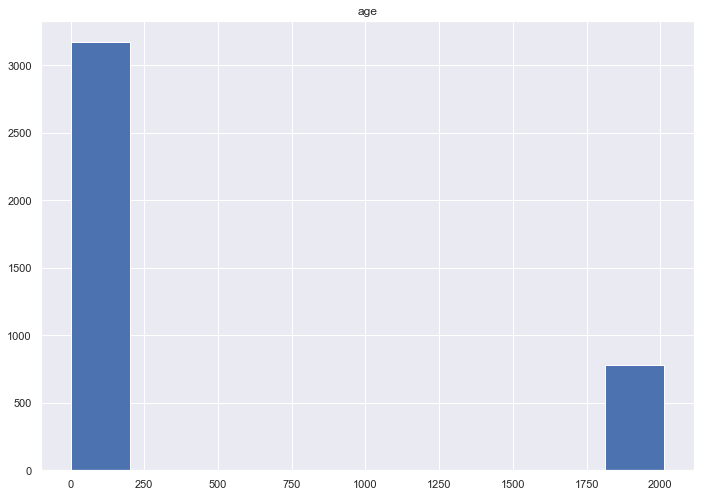

In [123]:
#There are people representing ages below 18 who are ineligible to do a booking on Airbnb,
#We also assumed that people above the age of 70 would not be potential tourists
dfcv = data
dfcv = dfcv[(dfcv.age > 70)|(dfcv.age < 18)]
dfcv.hist(column='age')
print(len(dfcv))

121511


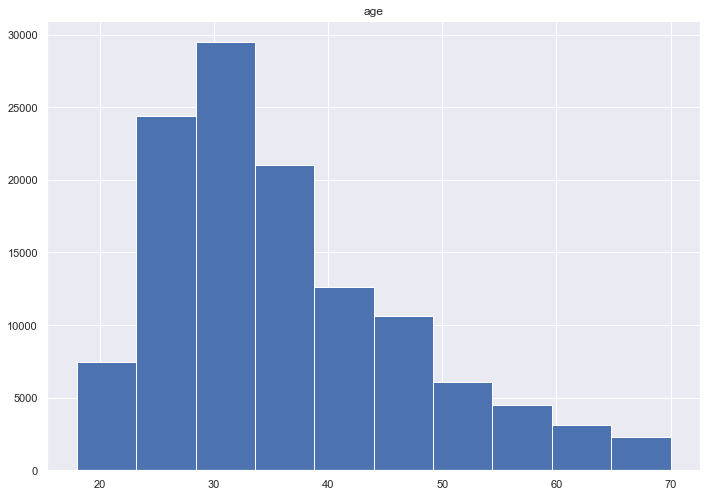

In [124]:
#Counting & Plotting data for ages between 18 to 70 as people under 18 cannot book a vacation and people above the age of 70 
# are unlikely to go on one
dfcv = data
dfcv = dfcv[(dfcv.age != '')]
dfcv = dfcv[(dfcv.age <= 70)]
dfcv = dfcv[(dfcv.age >= 18)]
dfcv.hist(column='age')
print(len(dfcv))

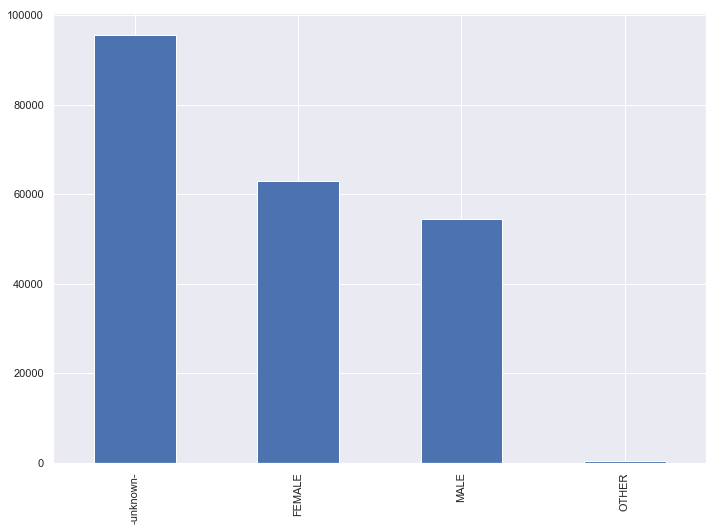

In [125]:
#Visualizing the data for all genders
# Unknown gender seems to be leading the charts followed by females and males, Classic case of 'data not missing at random'.
dfg = data
dfg = data['gender'].value_counts().plot(kind='bar')

In [126]:
import copy
%matplotlib inline

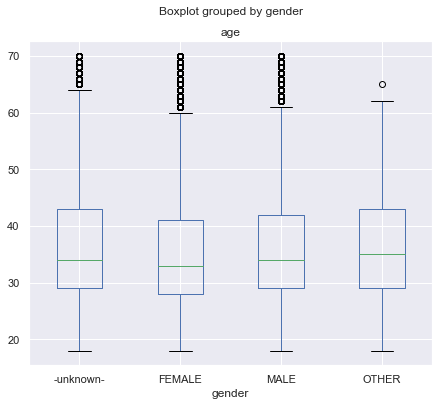

In [127]:
#Comparing Gender versus Age group, we observed that the median age group is around 32 to 35 but are different distributions
#Females, Males & Unknown have pointers which are 1.5 times the upper quartile
#25% of data for Females & Males is greater than the age of 60 & 62 respectively while unknown & Other have an age of 
#63 & 65
a = pd.read_csv('C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
acd = a[['age', 'gender']]
acd = acd[np.isfinite(acd['age'])]
acd = acd[acd.age >= 18]
acd = acd[acd.age <= 70]
acd.boxplot('age', 'gender', figsize=(7,6))

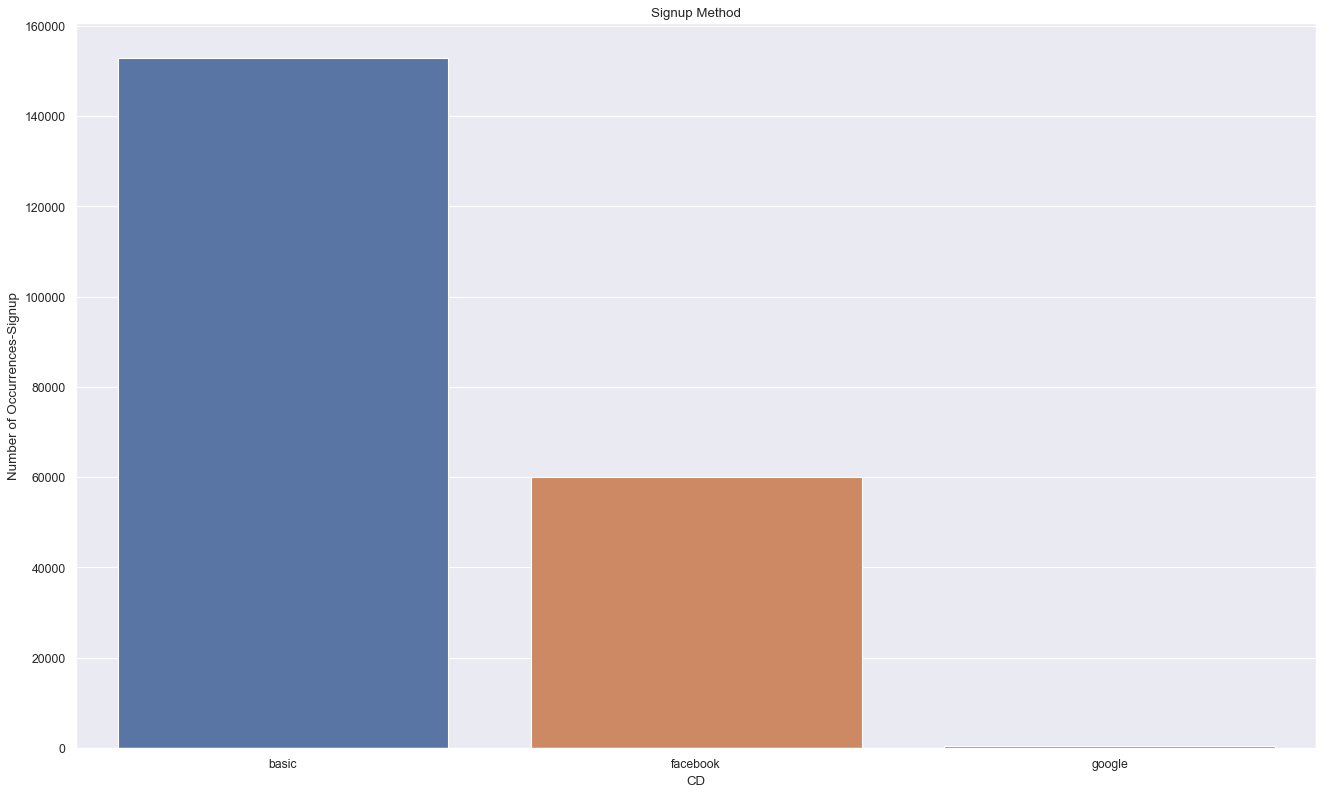

In [128]:
#Signup Method versus Country of destination
#We observed that basic signup method was used for sign up for most of the countries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['signup_method', 'country_destination']]
signup_count = scd['signup_method'].value_counts()
country_count = scd['country_destination'].value_counts()
sns.barplot(signup_count.index, signup_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

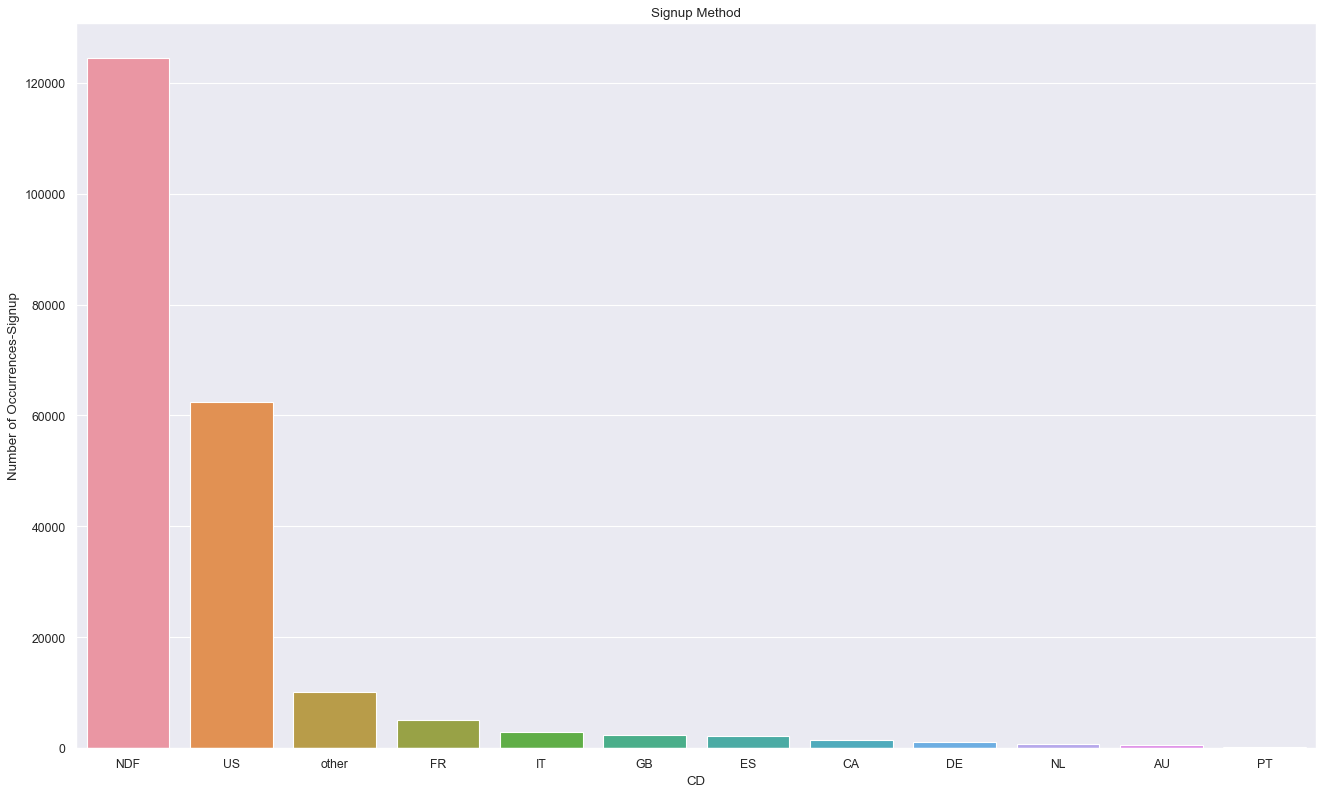

In [129]:
#Country of Destination versus age
#We observed that most of the age group chose no destination followed by the US and other
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['age', 'country_destination']]
cd_count = scd['country_destination'].value_counts()
age_count = scd['age'].value_counts()
sns.barplot(cd_count.index, cd_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

In [130]:
age_b = pd.read_csv(r'C:\Users\laks0\Documents\GitHub\Springboard\Capstone 1\age_bkts.csv')
age_b.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,15-19,AU,male,768,2015
1,15-19,AU,female,737,2015
2,15-19,CA,male,1054,2015
3,15-19,CA,female,1009,2015
4,15-19,DE,male,2076,2015


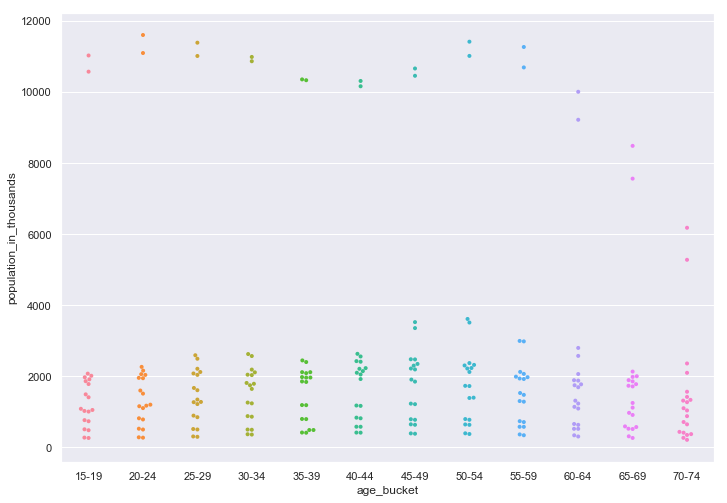

In [131]:
#Plotting the no. of people based on age range, we can see that the age group of 20-24,25-29 & 50-54 have the highest no. of people
# interested in going for a vacation
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='age_bucket', y='population_in_thousands', data=age_b, size = 4)

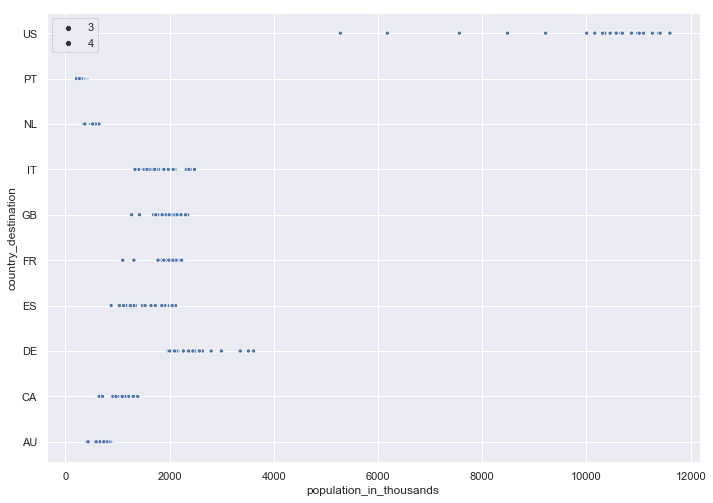

In [132]:
#Plotting the countries most people are interested in going to for a vacation; US clearly is the winner here followed by 
# Denmark & Italy
sns.set(rc={'figure.figsize':(11.7,8.27)})
countryplot = sns.scatterplot(x='population_in_thousands', y='country_destination', data=age_b, size = 4)

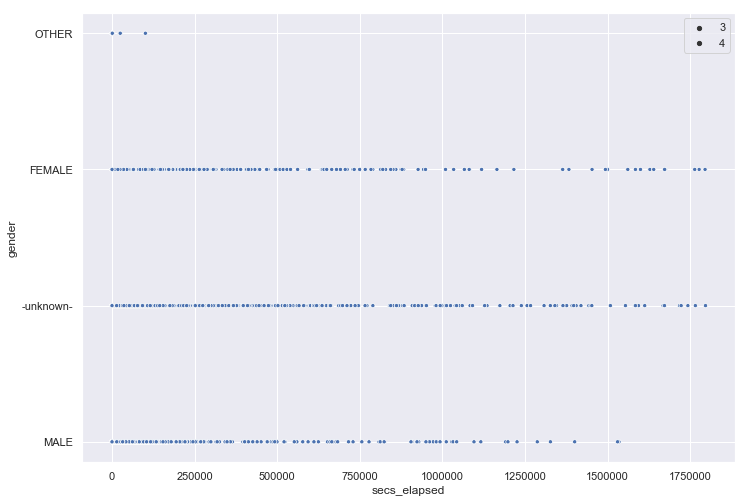

In [133]:
#Plotting the gender vs time spent on the website, Female & Unknown genders seem to be spending most amount of time browsing
sns.set(rc={'figure.figsize':(11.7,8.27)})
timeplot = sns.scatterplot(x='secs_elapsed', y='gender', data=data, size = 4)

In [134]:
#Second check on missing values, only seconds elapsed seem to be high in number and could also be removed as a column
#since it has 113k missing values out 121k total rows
print(len(df) - df.count())
print(len(df))

id                                   0
date_account_created                 0
date_first_booking               54948
gender                               0
age                                  0
                                 ...  
date_first_booking_2015-06-23        0
date_first_booking_2015-06-25        0
date_first_booking_2015-06-26        0
date_first_booking_2015-06-28        0
date_first_booking_2015-06-29        0
Length: 2152, dtype: int64
121511


In [44]:
#Dropping column name 'first_affiliate_tracked'as none of the data entries are relevant to what we intend to predict: Pls note 
# df includes people aged between 18 to 70 years only.#Second check on missing values, only seconds elapsed seem 
#to be high in number and could also be removed as a column, since it has 113k missing values out 121k total rows
df = data
df = df[(df.age != '')]
df = df[(df.age <= 70)]
df = df[(df.age >= 18)]
df = df.drop(columns=['secs_elapsed', 'first_affiliate_tracked'])
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,2.010000e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,Web,Mac Desktop,Safari,US


In [18]:
#Generate a hypothesis based on avg age of people visiting the top two oreferred countries US & Denamrk
#H0 = The avg age of people wanting to go to the US is approximately equal to the ones wanting to go to Denmark
#H1= The avg age of people wanting to go to the US is not at all equal to the ones wanting to go to Denmark
dfus = df[(df.country_destination == 'US')]
dfne = df[(df.country_destination == 'DE')]
dfus_age_m = np.mean(dfus['age'])
dfne_age_m = np.mean(dfne['age'])
dfus_age_sd = np.std(dfus['age'])
dfne_age_sd = np.std(dfne['age'])
print(len(dfus))
print(len(dfne))

62376
1061


In [25]:
# Conducting a t test on two independent samples
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=dfus_age_m, std1=dfus_age_sd, nobs1=62376,
                      mean2=dfne_age_m, std2=dfne_age_sd, nobs2=1061, equal_var = False)

Ttest_indResult(statistic=-1.1090201586927544, pvalue=0.2676675720686154)

In [ ]:
#Based on the above p value of 26% we can clearly reject our null hypothesis which states that the avg age of people wanting
#to go to the US is equal to the ones wanting to go to Denmark

In [136]:
#Conducting an Anova test on age & signup method
dffb = df[(df.signup_method == 'facebook')]
dfbs = df[(df.signup_method == 'basic')]
dfgl = df[(df.signup_method == 'google')]
df1 = dffb['age']
df2 = dfbs['age']
df3 = dfgl['age']

In [137]:
print('df1')
print(df1.describe())
print('df2')
print(df2.describe())
print('df3')
print(df3.describe())

df1
count    56575.000000
mean        35.405992
std         10.187335
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         70.000000
Name: age, dtype: float64
df2
count    64796.000000
mean        36.659038
std         11.206803
min         18.000000
25%         29.000000
50%         34.000000
75%         43.000000
max         70.000000
Name: age, dtype: float64
df3
count    140.000000
mean      34.385714
std       10.063529
min       18.000000
25%       27.000000
50%       31.500000
75%       39.000000
max       63.000000
Name: age, dtype: float64


In [138]:
#H0= The signup method does not relate anyways to the age of the person
#Test of normality/variance criteria:
#The assumptions for implementing one way ANOVA include-
#The normality criterion: each group compared should come from a population following the normal distribution.
#The variance criterion (or 'homogeneity of variances'): samples should come from populations with the same variance.
#Independent samples: performance (the dependent variable) in each sample should not be affected by the conditions
#in other samples.
import scipy.stats as stats
# Shapiro-Wilk normality test 
stats.shapiro(df1), stats.shapiro(df2), stats.shapiro(df3)

((0.921214759349823, 0.0),
 (0.9317247867584229, 0.0),
 (0.9196103811264038, 4.3936680071965384e-07))

In [ ]:
Df3's p value is greater than threshold a = 0.05, therefore we "fail to reject" the null hypothesis 
#(conclusion: samples come from populations that follow normal distribution).

In [139]:
# Levene variance test  
stats.levene(df1, df2, df3)

LeveneResult(statistic=220.13870719599072, pvalue=3.696295264023709e-96)

In [ ]:
#p value is greater than threshold a = 0.05, therefore we "fail to reject" the null hypothesis
#(conclusion: samples come from populations with the same variance)

In [140]:
#Performing a one way ANOVA 
F, p = stats.f_oneway(df1, df2, df3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p))

F statistic = 207.185 and probability p = 0.000


In [ ]:
#Interpretation of results:
#As p < a (0.05) we state that we have a main interaction effect. This simply means that amongst group comparison
#identifies statistically significant differences. However, this result does not identify the sample pair (or pairs)
#which cause this significance.
#So, when ANOVA reports 'interaction effect' we need to further identify the group pairs by applying pair-wise controls.
#Although these controls could be done by implementing ordinary t-test (as demonstrated below)

In [141]:
# apply ttest_indep()
t, p = stats.ttest_ind(df1, df2)
print('df1 vs df2:', t, p)

t, p = stats.ttest_ind(df1, df3)
print('df1 vs df2:', t, p)

t, p = stats.ttest_ind(df2, df3)
print('df2 vs df3:', t, p)

df1 vs df2: -20.269560244804744 3.3837520203276997e-91
df1 vs df2: 1.1835810452100621 0.23658390827855755
df2 vs df3: 2.39808641287269 0.016483781257107855


In [ ]:
#We can clearly see that the pairs df2 & 3(signup methods - basic & google) are the ones that cause the significant 
#differences.Please do note that applying a Tukey test would be more appropriate in this case than a t test for
#better accurancy however it is out of scope for this project.

In [35]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between gender and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['gender'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count. For example, the intersection of the 'Male' row 
#and the 'Canada' column of the table would represent how many males prefer going to Canada

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


In [36]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value < 0.05 , we reject the null hypothesis. There is a strong relationship between
#'gender' and the 'country of destination' column, we can see that these two variables are not independent of each other.

(9505.896027791285, 0.0, 33)

In [37]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between signup method and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['signup_method'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_method,,,,,,,,,,,,
basic,393,1105,737,1601,3767,1727,2147,87846,560,154,45430,7430
facebook,146,322,323,646,1253,597,686,36252,202,62,16867,2652
google,0,1,1,2,3,0,2,445,0,1,79,12


In [42]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value < 0.05 , we reject the null hypothesis. There is a strong relationship between
#'signup method' and the 'country of destination' column, we can see that these two variables are not 
#independent of each other.

(327.1860348028777, 3.610369016731558e-56, 22)

In [19]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between language and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['language'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
language,,,,,,,,,,,,
ca,0,0,0,0,0,0,0,2,0,0,2,0
cs,0,0,0,1,0,0,0,13,0,0,3,0
da,0,0,0,2,0,0,1,17,0,0,12,1
de,2,1,18,7,8,3,5,203,2,1,138,17
el,0,0,0,2,1,0,0,16,0,0,2,1
en,418,1037,789,1603,3506,1676,1903,52283,566,149,46081,7118
es,0,0,5,16,11,5,6,399,1,2,147,30
fi,0,0,0,0,1,0,0,5,0,0,4,1
fr,2,5,6,10,48,8,9,472,3,2,199,15


In [20]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'language' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(934.9181734684701, 8.626988945685242e-76, 264)

In [23]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between affiliate provider and country of destination 
#(are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['affiliate_provider'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
affiliate_provider,,,,,,,,,,,,
baidu,0,0,0,0,1,0,0,7,0,0,5,2
bing,3,10,11,14,28,9,20,586,5,4,371,69
craigslist,2,26,15,8,44,16,19,1048,5,1,964,41
direct,298,705,539,1141,2393,1159,1300,33425,371,98,31752,4910
email-marketing,0,0,0,0,0,1,1,47,1,0,21,6
facebook,2,9,15,25,39,24,24,943,9,2,411,86
facebook-open-graph,1,4,2,2,10,3,3,273,2,1,81,13
google,95,244,210,395,944,420,512,13393,161,44,10375,1736
gsp,1,0,0,0,1,0,1,143,0,0,23,7


In [24]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'affiliate provider' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(1288.6116440778364, 2.049285268511125e-168, 176)

In [38]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between date account was created and country of destination 
#(are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['date_account_created'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
date_account_created,,,,,,,,,,,,
2010-01-02,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-03,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-04,0,0,0,0,0,0,0,0,0,0,3,0
2010-01-05,0,0,0,0,0,0,0,2,0,0,0,0
2010-01-07,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-26,2,3,1,4,4,2,4,156,1,0,99,17
2014-06-27,0,2,1,3,12,1,4,159,3,0,114,14
2014-06-28,0,3,1,3,9,5,5,120,1,0,97,8


In [39]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'date account created' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(20749.491054798717, 3.8943422545473145e-49, 17831)

In [40]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between the device used to browse/signup and country of destination 
#(are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['first_device_type'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_device_type,,,,,,,,,,,,
Android Phone,0,11,4,9,14,2,11,690,2,0,432,65
Android Tablet,0,6,3,8,18,1,11,305,5,2,223,41
Desktop (Other),3,17,12,7,17,5,6,317,4,0,304,43
Mac Desktop,224,525,452,853,1966,932,999,23560,305,84,23323,3363
Other/Unknown,8,16,7,28,55,24,17,2667,9,2,930,138
SmartPhone (Other),0,0,0,0,1,0,1,21,0,0,15,1
Windows Desktop,128,379,253,551,1081,533,631,18638,166,51,15511,2662
iPad,32,48,45,102,244,109,161,3478,56,7,2666,472
iPhone,28,46,49,104,208,99,117,5272,33,8,3875,544


In [41]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'first device type' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(1662.6538804271956, 5.641255919580156e-289, 88)

In [167]:
df = data
df = df[(df.age != '')]
df = df[(df.age <= 70)]
df = df[(df.age >= 18)]
df = df.drop(columns=['secs_elapsed', 'first_affiliate_tracked', 'timestamp_first_active', 'signup_flow'])
# overwriting gender column with replaced value of unknown
df["gender"]= df["gender"].replace("-unknown-", "unknown") 
df.head()

,id,date_account_created,date_first_booking,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,NaN,MALE,38.0,facebook,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,56.0,basic,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,42.0,facebook,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2010-02-18,unknown,41.0,basic,en,direct,direct,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-05,FEMALE,46.0,basic,en,other,craigslist,Web,Mac Desktop,Safari,US


In [168]:
# Creating a final dataframe for model building:
dffinal = df.drop(columns=['date_account_created', 'date_first_booking', 'affiliate_channel', 'affiliate_provider','first_browser'])
dffinal.head()

,id,gender,age,signup_method,language,signup_app,first_device_type,country_destination
1,820tgsjxq7,MALE,38.0,facebook,en,Web,Mac Desktop,NDF
2,4ft3gnwmtx,FEMALE,56.0,basic,en,Web,Windows Desktop,US
3,bjjt8pjhuk,FEMALE,42.0,facebook,en,Web,Mac Desktop,other
4,87mebub9p4,unknown,41.0,basic,en,Web,Mac Desktop,US
6,lsw9q7uk0j,FEMALE,46.0,basic,en,Web,Mac Desktop,US


In [186]:
#Grouping categories in all the columns to reduce the no. of categories for better modelling:

dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Mac Desktop', 'iPhone', 'iPad']), 
                                      'Mac', dffinal['first_device_type'])
dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Windows Desktop', 'Android Tablet', 
                                                                            'Android Phone']), 
                                      'Win', dffinal['first_device_type'])
dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Other/Unknown', 'Desktop (Other)',
                                                                            'SmartPhone (Other)']), 
                                      'Other', dffinal['first_device_type'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'zh', 'ko', 'ja', 'id', 'th', 'ca' ]), 
                                      'Asian', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'ru', 'sv' ]), 
                                      'Russian', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'el', 'hr' ]), 
                                      'African', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'de', 'es', 'fr', 'it', 'pt', 'nl', 'pl', 'hu', 
                                                          'da', 'fi', 'no', 'tr', 
                                                          'cs','is']), 
                                      'Eur', dffinal['language'])
dffinal['gender']=np.where(np.isin(dffinal['gender'],['OTHER']), 
                                      'unknown', dffinal['gender'])

In [189]:
#Checking unique values
print(dffinal.language.unique())
print(dffinal.signup_app.unique())
print(dffinal.first_device_type.unique())
print(dffinal.signup_method.unique())
print(dffinal.gender.unique())

['en' 'Eur' 'Asian' 'Russian' 'African']
['Web' 'Moweb' 'iOS' 'Android']
['Mac' 'Win' 'Other']
['facebook' 'basic' 'google']
['MALE' 'FEMALE' 'unknown']


In [191]:
#Converting each categorical variable to numerical
dffinal_g = dffinal.copy()
dffinal_g = pd.get_dummies(dffinal_g, columns=['gender'], prefix = ['gen'])
print(dffinal_g.head())

           id   age signup_method language signup_app first_device_type  \
1  820tgsjxq7  38.0      facebook       en        Web               Mac   
2  4ft3gnwmtx  56.0         basic       en        Web               Win   
3  bjjt8pjhuk  42.0      facebook       en        Web               Mac   
4  87mebub9p4  41.0         basic       en        Web               Mac   
6  lsw9q7uk0j  46.0         basic       en        Web               Mac   

  country_destination  gen_FEMALE  gen_MALE  gen_unknown  
1                 NDF           0         1            0  
2                  US           1         0            0  
3               other           1         0            0  
4                  US           0         0            1  
6                  US           1         0            0  


In [192]:
dffinal_sm = dffinal_g.copy()
dffinal_sm = pd.get_dummies(dffinal_sm, columns=['signup_method'], prefix = ['sm'])
print(dffinal_sm.head())

           id   age language signup_app first_device_type country_destination  \
1  820tgsjxq7  38.0       en        Web               Mac                 NDF   
2  4ft3gnwmtx  56.0       en        Web               Win                  US   
3  bjjt8pjhuk  42.0       en        Web               Mac               other   
4  87mebub9p4  41.0       en        Web               Mac                  US   
6  lsw9q7uk0j  46.0       en        Web               Mac                  US   

   gen_FEMALE  gen_MALE  gen_unknown  sm_basic  sm_facebook  sm_google  
1           0         1            0         0            1          0  
2           1         0            0         1            0          0  
3           1         0            0         0            1          0  
4           0         0            1         1            0          0  
6           1         0            0         1            0          0  


In [193]:
dffinal_fd = dffinal_sm.copy()
dffinal_fd = pd.get_dummies(dffinal_fd, columns=['first_device_type'], prefix = ['fd'])
print(dffinal_fd.head())

           id   age language signup_app country_destination  gen_FEMALE  \
1  820tgsjxq7  38.0       en        Web                 NDF           0   
2  4ft3gnwmtx  56.0       en        Web                  US           1   
3  bjjt8pjhuk  42.0       en        Web               other           1   
4  87mebub9p4  41.0       en        Web                  US           0   
6  lsw9q7uk0j  46.0       en        Web                  US           1   

   gen_MALE  gen_unknown  sm_basic  sm_facebook  sm_google  fd_Mac  fd_Other  \
1         1            0         0            1          0       1         0   
2         0            0         1            0          0       0         0   
3         0            0         0            1          0       1         0   
4         0            1         1            0          0       1         0   
6         0            0         1            0          0       1         0   

   fd_Win  
1       0  
2       1  
3       0  
4       0  
6       

In [194]:
dffinal_sa = dffinal_fd.copy()
dffinal_sa = pd.get_dummies(dffinal_sa, columns=['signup_app'], prefix = ['sa'])
print(dffinal_sa.head())

           id   age language country_destination  gen_FEMALE  gen_MALE  \
1  820tgsjxq7  38.0       en                 NDF           0         1   
2  4ft3gnwmtx  56.0       en                  US           1         0   
3  bjjt8pjhuk  42.0       en               other           1         0   
4  87mebub9p4  41.0       en                  US           0         0   
6  lsw9q7uk0j  46.0       en                  US           1         0   

   gen_unknown  sm_basic  sm_facebook  sm_google  fd_Mac  fd_Other  fd_Win  \
1            0         0            1          0       1         0       0   
2            0         1            0          0       0         0       1   
3            0         0            1          0       1         0       0   
4            1         1            0          0       1         0       0   
6            0         1            0          0       1         0       0   

   sa_Android  sa_Moweb  sa_Web  sa_iOS  
1           0         0       1       0  
2 

In [195]:
#Final dataset
dffinal_lg = dffinal_sa.copy()
dffinal_lg = pd.get_dummies(dffinal_lg, columns=['language'], prefix = ['lng'])
print(dffinal_lg.head())

           id   age country_destination  gen_FEMALE  gen_MALE  gen_unknown  \
1  820tgsjxq7  38.0                 NDF           0         1            0   
2  4ft3gnwmtx  56.0                  US           1         0            0   
3  bjjt8pjhuk  42.0               other           1         0            0   
4  87mebub9p4  41.0                  US           0         0            1   
6  lsw9q7uk0j  46.0                  US           1         0            0   

   sm_basic  sm_facebook  sm_google  fd_Mac  ...  fd_Win  sa_Android  \
1         0            1          0       1  ...       0           0   
2         1            0          0       0  ...       1           0   
3         0            1          0       1  ...       0           0   
4         1            0          0       1  ...       0           0   
6         1            0          0       1  ...       0           0   

   sa_Moweb  sa_Web  sa_iOS  lng_African  lng_Asian  lng_Eur  lng_Russian  \
1         0       1  